<h1>A1:Integration</h1>
<p>Anand Kamble</p>
<a href="mailto:amk23j@fsu.edu">amk23j@fsu.edu</a>
<p>13th September 2023</p>
<hr style="border:2px solid gray"/>

## 1.

We will use this function for the sub-questions, 

$$f(x) = e^{-x^2}$$

### a. $[-\infty,\infty]$ &rarr; $[-1,1]$



$$ I = \int_{-\infty}^{\infty} f(x)dx $$  

let, $ y = {2 \over {1 + e^{-x}}} - 1 $
  
$ \therefore x = - log({{2 \over {y + 1} - 1}}) $ and $ dx = {{-1} \over {{2 \over {y + 1}} - 1}} dy $

$$\therefore I = \int_{y=1}^{y=-1} e^{-[-log({2 \over {y + 1}} - 1 )]^2} {{-1} \over {{2 \over {y + 1}} - 1}} dy $$

$$\therefore I = \int_{y=-1}^{y=1} e^{-[-log({2 \over {y + 1}} - 1 )]^2} {{1} \over {{2 \over {y + 1}} - 1}} dy $$

---
### b. $[0,\infty]$ &rarr; $[0,1]$



$$ I = \int_{0}^{\infty} f(x)dx $$

Let, $ y = e^{-x}$    
so that, 
$ x = -log(y)$ and $ dx = {{-1}\over y}dy $
substituting these values, 

$$ I = \int_{y=1}^{y=0} e^{{-(-log(y))}^2} ({-1\over y} dy) $$


$$ I = \int_{y=0}^{y=1} e^{{-(-log(y))}^2} ({1\over y} dy) $$

___
<div style="page-break-after: always;"></div>

### c. $[0,\infty]$ &rarr; $[-1,1]$


$$ I = \int_{0}^{\infty} f(x)dx $$

Let, $ y = 1 - 2e^{-x}$   

$ \therefore x = - log ({{1 - y} \over 2 }) $ and $ dx = {-2 \over {1 - y}} dy $

$$ I = \int_{y=-1}^{y=1} e^{-[{- log ({{1 - y} \over 2 }) }]} {-2 \over {1 - y}} dy $$

<br/>
<br/>
<br/>
<br/>
<br/>
<hr style="border:2px solid gray"/>


## 2. Direct MC in High Dimensions

In [1]:
import numpy as np
from scipy.special import gamma
import matplotlib.pyplot as plt
from typing import Union, Final
from IPython.display import Markdown, display
import warnings
warnings.filterwarnings("error")

### Volume of HyperSphere
$$Vs = {\pi^n/2 \over \Gamma({n/2 + 1})}R^n$$

In [2]:
def Volume_of_HyperSphere(dimensions:int,radius:Union[int,float]) -> Union[int,float]:
    """Calculate the volume of hypersphere
    
    Args:
        dimensions (int): Number of dimensions
        radius (int or float): Radius of the sphere
 
    Returns:
        int or float: The Volume of Hypersphere
    """
    return ((np.pi**(dimensions/2))/gamma((dimensions/2)+1))*(radius**dimensions)


<div style="page-break-after: always;"></div>

### Volume of HyperCube
$$Vc = L^n$$


In [3]:
def Volume_of_HyperCube(dimensions:int,length:Union[int,float]) -> Union[int,float]:
    """Calculate the volume of hypercube
    
    Args:
        dimensions (int): Number of dimensions
        radius (int or float): Radius of the sphere
 
    Returns:
        int or float: The Volume of Hypersphere
    """
    return length**dimensions

Plotting the ratio of volumes ($V_s/V_c$) w.r.t. dimensions (n)

In [4]:
def plot_ratio(radius:Union[int,float],dimensions:int) -> None:
    """Plot the ratio as a function of n
    
    Args:
        radius (int or float): Radius of the sphere
        dimensions (int): Number of dimensions
 
    Returns:
        None
    """
    try:
        dimensions_to_simulate = np.arange(0,dimensions,1)
        plt.plot(dimensions_to_simulate,
                 Volume_of_HyperSphere(dimensions_to_simulate,2)/Volume_of_HyperCube(dimensions_to_simulate,2*radius),
                 marker='o')
        plt.xlabel('Dimensions (n)') 
        plt.ylabel('$V_s / V_c$') 
        plt.show()
    except:
        display(Markdown('## Something went wrong!\n### Please check the values entered.'))

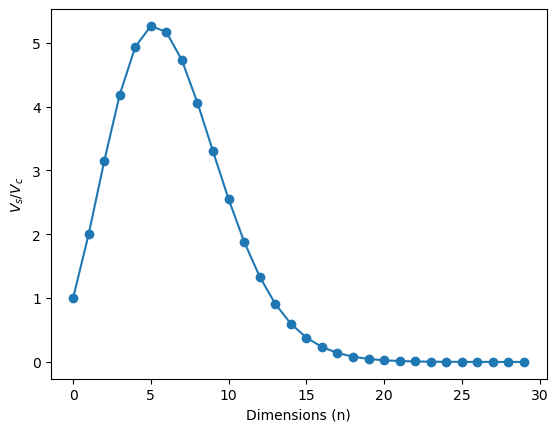

In [5]:
plot_ratio(1,30)

<br/>
<br/>
<br/>
<br/>
<br/>
<hr style="border:2px solid gray"/>
<br/>
<br/>
<br/>
<br/>
<br/>

<div style="page-break-after: always;"></div>


## 3. Basic Integration

Using Monte Carlo integration to find the volume of a right circular cone of height H = 2,
whose base is a unit circle centered at (0,0)

$$I = \int_{-1}^{1} \int_{-1}^{1} g(x_1, x_2) dx_1 dx_2,$$

where, $$g(x_1,x_2) = \begin{cases} H(1 - \sqrt{x_1^2 + x_2^2}), \text{ if } x_1^2 + x_2^2 \leq 1 \\ 0, \text{ otherwise}.\end{cases}$$

Since the domain size is 4, we need to multiply $\bar{g}$ by 4

In [6]:
# Declaring a constant value of height.
HEIGHT:Final[int] = 2
TRUE_VOLUME = np.pi*HEIGHT/3

In [7]:
def MC_method(number_of_points:int) -> float:
    
    try:
        # Generating random number between -1 to 1.
        x1 = np.random.uniform(-1,1,size=number_of_points)
        x2 = np.random.uniform(-1,1,size=number_of_points)

        # Defining the condition.
        condition = x1**2 + x2**2 <= 1 

        # Creating an array which will hold the values of g.
        g = np.zeros(number_of_points)

        # Calculating the height for the points which satisfy the condition.
        for i,x in enumerate(condition):
            g[i] = HEIGHT*(1-np.sqrt(x1[i]**2+x2[i]**2)) if x else 0
        
        # Calculating the mean of g and multiplying it by domain size.
        return np.sum(g)*4/float(number_of_points)
    except:
        display(Markdown('## Something went wrong!'))

### Calculating the volume of cone by using Monte Carlo method

In [8]:
MC_result = MC_method(1000)
display(Markdown(f'Volume using n = 1000 is <b>{MC_result}<b/>.'))
display(Markdown(f'The difference between True Volume ( {TRUE_VOLUME} ) <br/>and the volume calculated by Monte Carlo method is <b>{abs(TRUE_VOLUME - MC_result)}<b/>.'))

Volume using n = 1000 is <b>2.1177923096181495<b/>.

The difference between True Volume ( 2.0943951023931953 ) <br/>and the volume calculated by Monte Carlo method is <b>0.023397207224954197<b/>.

<div style="page-break-after: always;"></div>

### Observing effects of increasing the n in MC_method on the Volume.

In [9]:
def plot(iterations:int = 100) -> None:
    MC_results = np.zeros(iterations)
    for i in range(1,iterations):
        MC_results[i] = MC_method(i)
    plt.plot(MC_results,label='Volume by Monte Carlo Method')
    plt.axhline(TRUE_VOLUME,color='r',label='True Volume')
    plt.ylabel('Volume')
    plt.xlabel('Number of points')
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    plt.show()

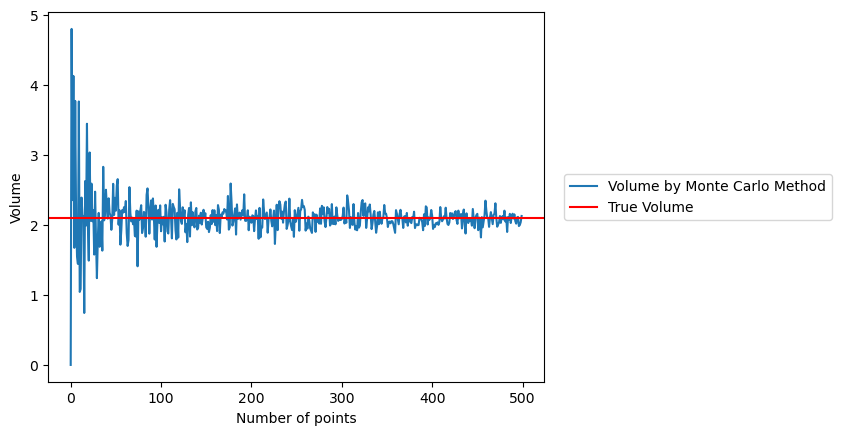

In [10]:
plot(500)

It can be seen from the above graph that the volume calculated by the Monte Carlo method gets closer to the true volume as the number of point increases. 

<br/>
<br/>
<br/>
<br/>
<br/>
<hr style="border:2px solid gray"/>
